In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_fn(fold, epoch):
    # return f'{indir}/confusion_matrix_epoch{epoch}.csv'
    return f'results/{fold}/confusion_matrix_bubble_epoch{epoch}.csv'

def get_conf_mat(fn):
    conf_mat = pd.read_csv(fn,header=None)
    conf_mat = np.array(conf_mat)
    return conf_mat

def get_accuracy(conf_mat):
    return np.sum(np.diag(conf_mat)) / np.sum(conf_mat)

def get_power(df, degree=0):
    # df is a pandas dataframe of shape (n_classes, n_classes)
    # power: among the expected positive, how many are predicted related
    # rows are expected, columns are predicted
    expected_pos = df.iloc[degree, :].sum()
    predicted_pos = df.iloc[:, degree].sum()
    true_pos = df.iloc[degree, degree]
    predicted_unrelated = df.iloc[degree, 0].sum()
    power = 1 - (predicted_unrelated/expected_pos)
    recall = true_pos/expected_pos
    precision = true_pos/predicted_pos
    f1 = 2*precision*recall/(precision+recall)
    return power*100, recall*100, precision*100, f1*100

def get_F1_score(conf_mat):
    # conf_mat is a numpy array of shape (n_classes, n_classes)
    # rows are predicted, columns are expected
    # return a list of F1 scores for each class
    df = conf_mat.T # rows are expected, columns are predicted
    df = pd.DataFrame(df)
    F1_scores = []
    for i in range(df.shape[0]):
        F1_scores.append(get_power(df, i)[3])
    return F1_scores

def plot_confusion_matrix(conf_mat, labels):
    plt.figure(figsize=(8,8))
    # Create annotation array: show value if nonzero, else empty string
    conf_mat = np.round(conf_mat).astype(int)
    annot = np.where(conf_mat != 0, conf_mat.astype(str), "")
    sns.heatmap(conf_mat, annot=annot, cmap='Blues', cbar=False, 
                xticklabels=labels, yticklabels=labels, fmt='', annot_kws={"size": 10})
    plt.title('Confusion Matrix')
    plt.xlabel('Expected %')
    plt.ylabel('Predicted %')
    plt.show()

def plot_bubble_matrix(conf_mat, labels):
    # use bubble size to represent the value
    plt.figure(figsize=(12, 12))
    # Set up the plot
    n_classes = conf_mat.shape[0]
    x, y = np.meshgrid(np.arange(n_classes), np.arange(n_classes))
    # Scale bubble sizes - multiply by some factor to make bubbles visible but not overlapping
    sizes = conf_mat * 12  # Adjust multiplier as needed
    plt.scatter(x.flatten(), y.flatten(), s=sizes.flatten(), alpha=.8, c='black', edgecolors='white')
    plt.xlabel('Expected', fontsize=20)
    plt.ylabel('Predicted', fontsize=20)    
    # Set integer ticks
    ticks = np.arange(0,n_classes)
    # tick_labels = [f'{i}' for i in ticks]
    plt.xticks(ticks, labels, fontsize=16, rotation=90)
    plt.yticks(ticks, labels, fontsize=16)
    
    # # Add text annotations to show the values
    for i in range(n_classes):
        for j in range(n_classes):
            plt.text(j, i, f"{conf_mat[i, j]:.0f}", ha='center', va='center', color='white', fontsize=12) if conf_mat[i, j] > 20 else None
    
    # Add gridlines to make it easier to read
    plt.grid(True, linestyle='--', alpha=0.1)
    
    # expand the xlim and ylim so that the bubbles are not cut off
    plt.xlim(-1, n_classes)
    plt.ylim(-1, n_classes)
    plt.show()
    plt.close()
    


In [5]:
populations = [
    # EAS
    'CHB',
    'CHS',
    'CDX',
    'KHV',
    'JPT',
    # EUR
    'CEU+GBR',
    'IBS',
    'TSI',
    'FIN',
    # AFR
    'GWD',
    'MSL',
    'LWK',
    'ESN',
    'YRI',
    # SAS
    'PJL',
    'BEB',
    # AMR
    'PUR',
    'CLM',
    'PEL',
]

labels = populations
print(labels)

['CHB', 'CHS', 'CDX', 'KHV', 'JPT', 'CEU+GBR', 'IBS', 'TSI', 'FIN', 'GWD', 'MSL', 'LWK', 'ESN', 'YRI', 'PJL', 'BEB', 'PUR', 'CLM', 'PEL']


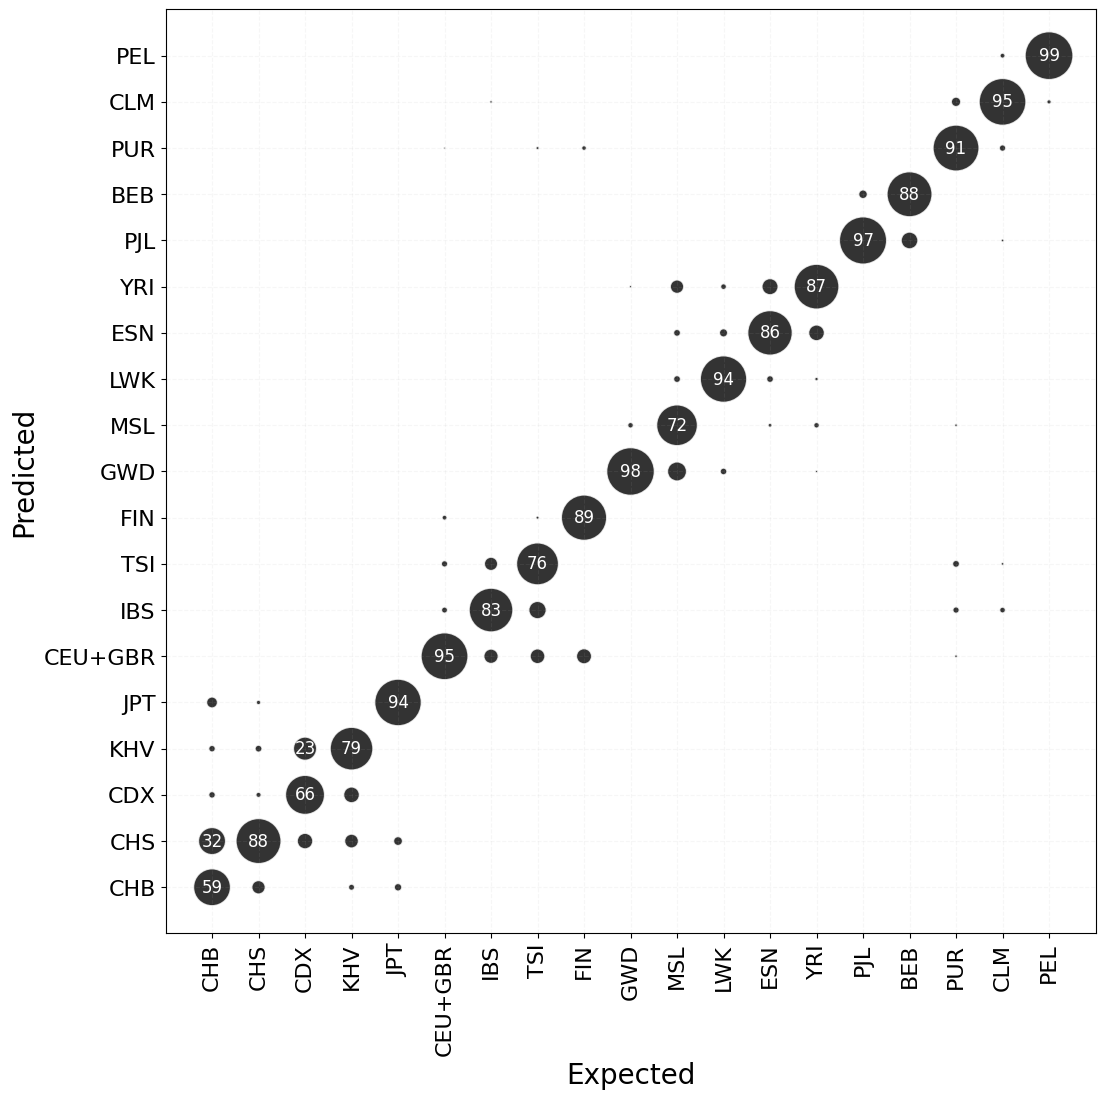

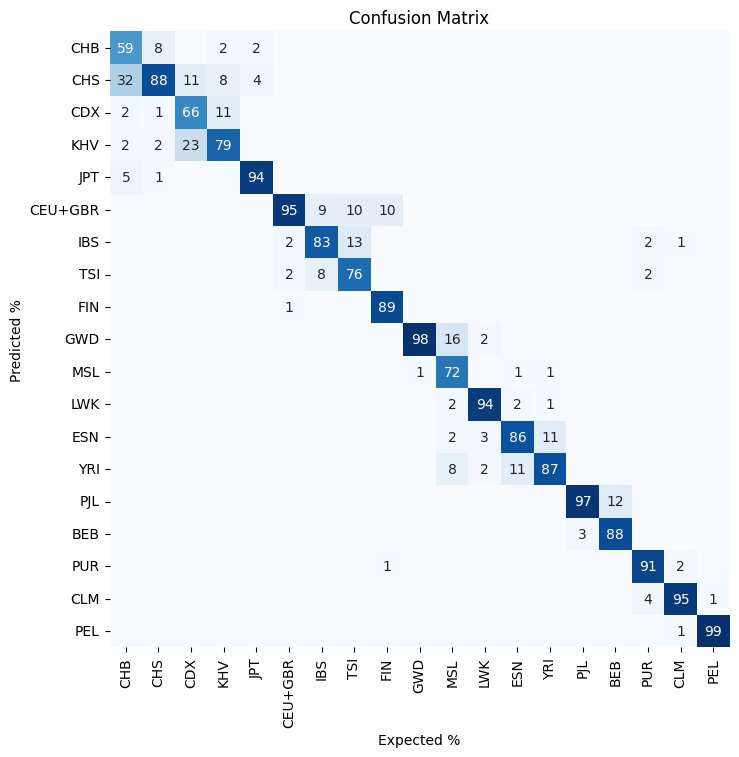

CHB 69
CHS 73
CDX 73
KHV 77
JPT 94
CEU+GBR 85
IBS 82
TSI 81
FIN 93
GWD 91
MSL 82
LWK 94
ESN 85
YRI 84
PJL 92
BEB 92
PUR 94
CLM 95
PEL 99
Overall F1 score: 86.1


In [6]:
fold2epoch = {
    'f0': 524,
    'f1': 539,
    'f2': 504,
    'f3': 539,
    'f4': 550,
    'f5': 263,
    'f6': 358,
    'f7': 306,
    'f8': 442,
    'f9': 487,
}

conf_mats = []
for fold in fold2epoch.keys():
    epoch = fold2epoch[fold]
    fn = get_fn(fold, epoch)
    conf_mat = get_conf_mat(fn)
    conf_mats.append(conf_mat)

# average the conf_mats
conf_mat = np.mean(conf_mats, axis=0)

# plot the conf_mat
plot_bubble_matrix(conf_mat, labels)
plot_confusion_matrix(conf_mat, labels)

f1 = get_F1_score(conf_mat)
# remove nan
f1 = [i for i in f1 if not np.isnan(i)]
[print(i,f'{j:.0f}') for i,j in zip(labels, f1)]

overall_F1 = np.mean(f1)
print(f'Overall F1 score: {overall_F1:.1f}')